In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
path = '/home/chrisjan/project/models/object_detection'
os.chdir(path)
sys.path.append('..')
from utils import label_map_util
from utils import visualization_utils as vis_util

In [2]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

base_path = '/home/chrisjan/project/training/4fish'
PB_PATH = base_path + '/output/frozen_inference_graph.pb'
PATH_TO_LABELS = base_path + '/data/object-detection.pbtxt'
PATH_TO_TEST_IMAGES_DIR = '/home/chrisjan/project/training/4fish_test'
NUM_CLASSES = 1
IMAGE_SIZE = (24, 16)

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
TEST_IMAGE_PATHS = [PATH_TO_TEST_IMAGES_DIR + '/' + filename for filename in os.listdir(PATH_TO_TEST_IMAGES_DIR)]
images = [Image.open(i) for i in TEST_IMAGE_PATHS]

In [3]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PB_PATH, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [8]:
imgs_comb1 = np.hstack((np.asarray(i) for i in images[:2]))
imgs_comb2 = np.hstack((np.asarray(i) for i in images[2:4]))
#imgs_comb3 = np.hstack((np.asarray(i) for i in images[5:8]))
#imgs_comb3 = np.hstack((np.asarray(i) for i in images[4:6]))
#imgs_comb4 = np.hstack((np.asarray(i) for i in images[6:8]))
#imgs_comb = np.vstack((imgs_comb1, imgs_comb2, imgs_comb3, imgs_comb4))
#imgs_comb = np.vstack((imgs_comb1, imgs_comb2, imgs_comb3))
imgs_comb = np.vstack((imgs_comb1, imgs_comb2))
imgs_comb = Image.fromarray(imgs_comb)
#imgs_comb = imgs_comb.resize([640,517])

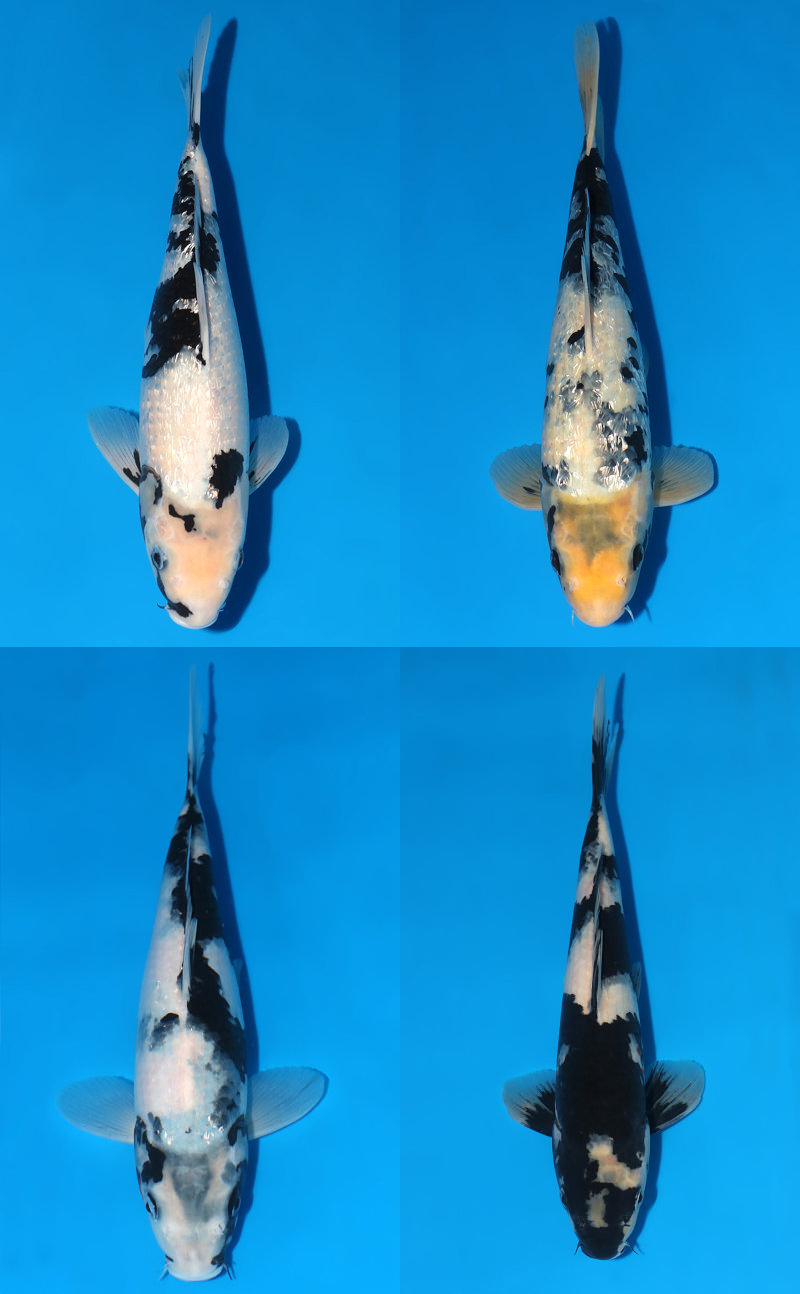

In [9]:
imgs_comb

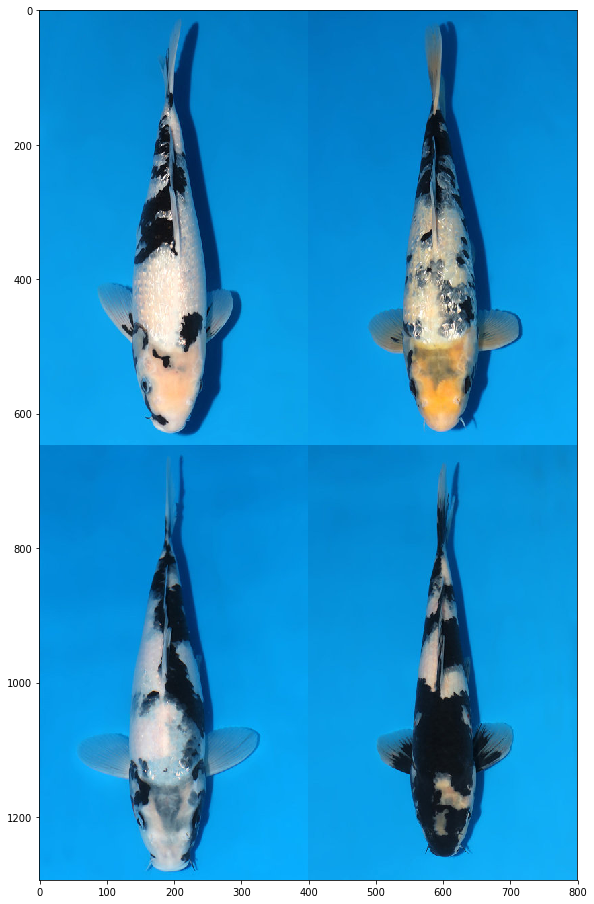

In [10]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_np = load_image_into_numpy_array(imgs_comb)
        image_np_expanded = np.expand_dims(image_np, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections], feed_dict={image_tensor: image_np_expanded})
        vis_util.visualize_boxes_and_labels_on_image_array(
            image_np,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8)
        plt.figure(figsize=IMAGE_SIZE)
        plt.imshow(image_np)

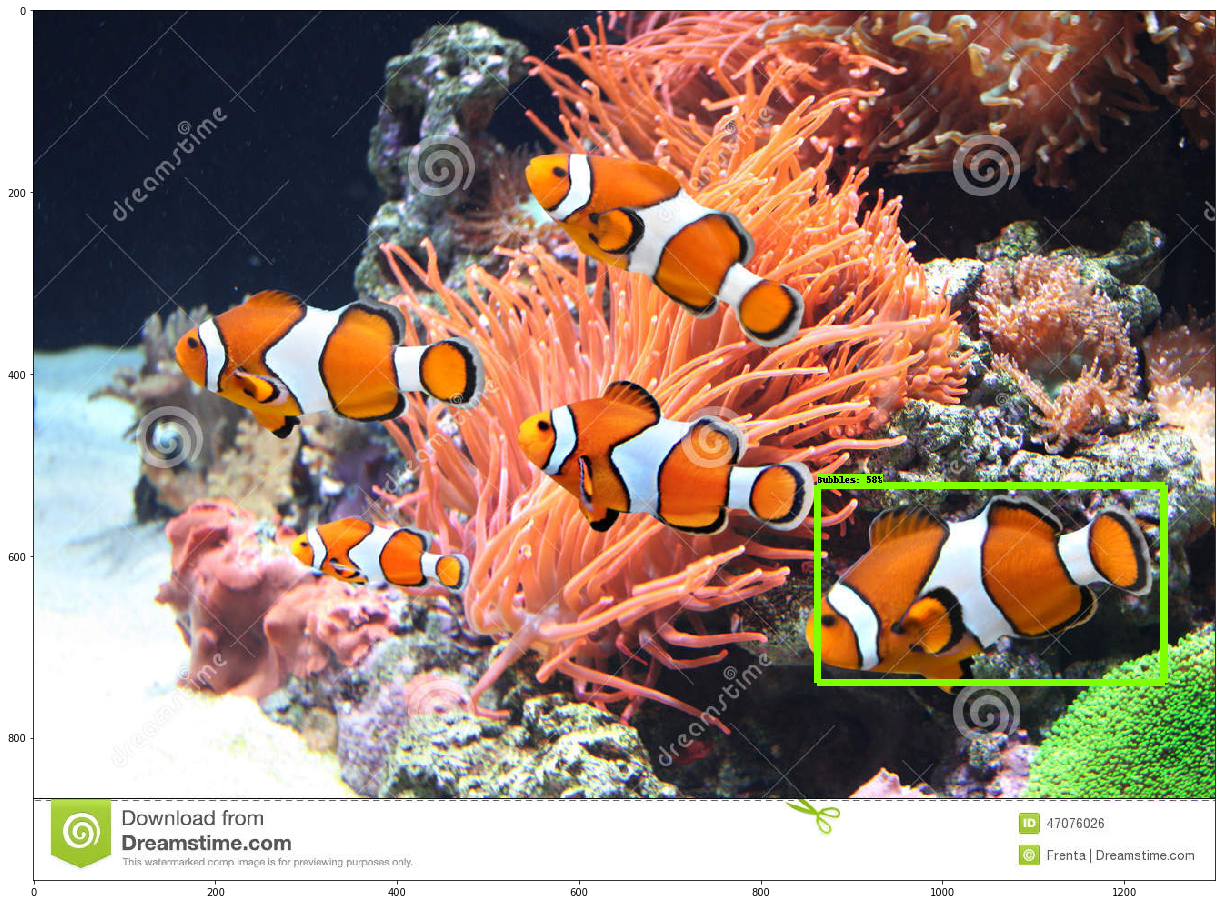

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


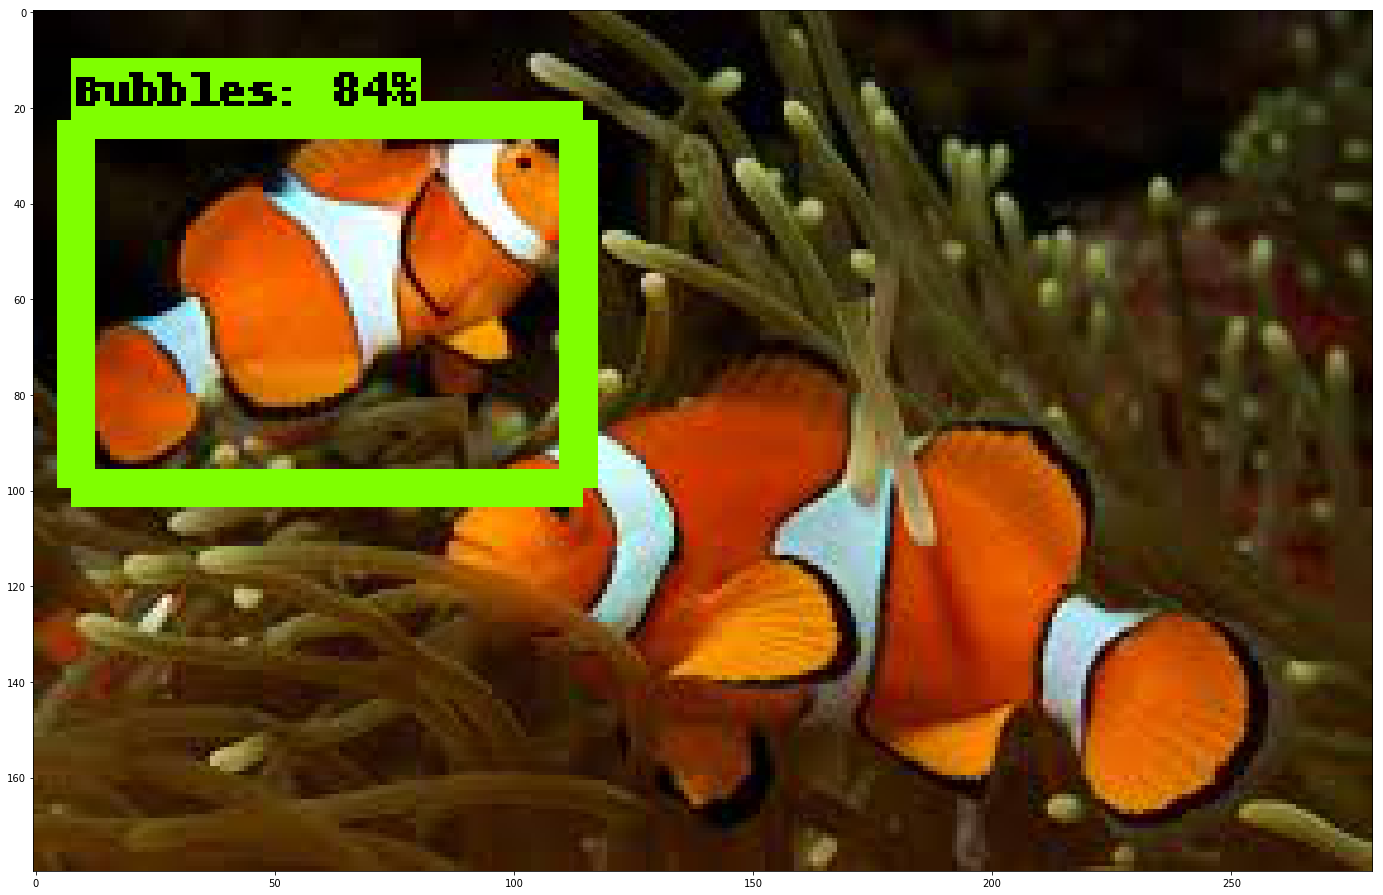

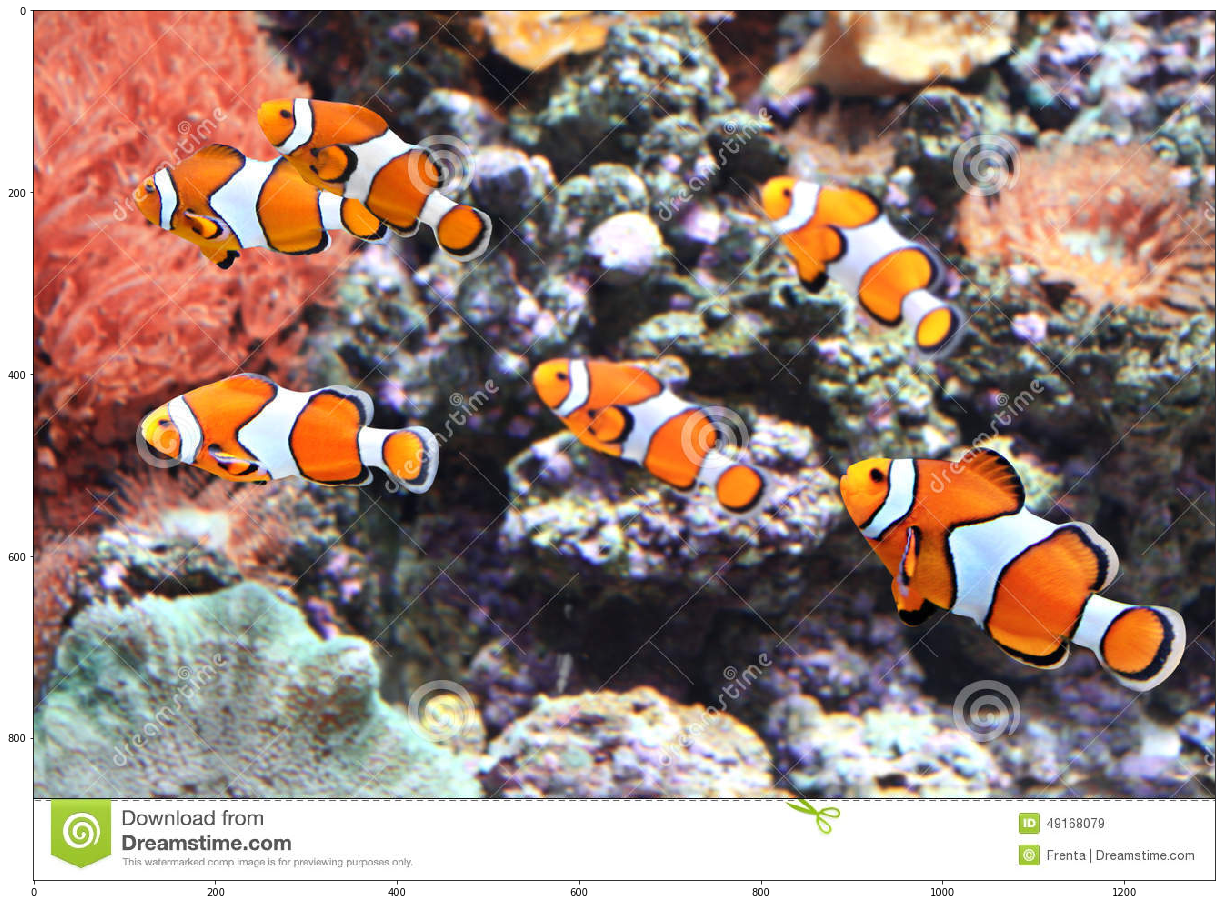

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [4]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            #image = image.rotate(45, expand=True)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            (boxes, scores, classes, num_detections) = sess.run([boxes, scores, classes, num_detections], feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=8)
            #print(image_path)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)